In [7]:
import plotly.express as px
import pandas as pd
import numpy as np

import csa_data
import csa_constants

In [8]:
chat_data = csa_data.get_json_data(csa_constants.SENTIMENT_CHAT_DATA_FILE)

chat_df = pd.DataFrame(chat_data['messages'])
chat_df['date'] = pd.to_datetime(chat_df['date'])

chat_df = chat_df.replace(0.0, np.nan)

chat_df.head()

,text,date,sentiment
0,doge is going cray,2021-05-01 00:56:05,NaN
1,sell target of doge,2021-05-01 00:57:07,NaN
2,doge,2021-05-01 00:58:11,NaN
3,"anyway, is doge a good crypto for long term in...",2021-05-01 01:00:32,0.325
4,doge target 🎯,2021-05-01 01:03:16,NaN


In [9]:
grouper = pd.Grouper(key='date', freq='1D')
stats_per_day = chat_df.groupby(grouper)['sentiment'].agg(['mean', 'count']).reset_index()

stats_per_day.rename(columns={'mean': 'avg. sentiment'}, inplace=True)

stats_per_day.head()

,date,avg. sentiment,count
0,2021-05-01,0.297548,8
1,2021-05-02,0.074028,4
2,2021-05-03,0.212222,5
3,2021-05-04,0.172581,22
4,2021-05-05,0.238335,15


# Chat Messages per Day

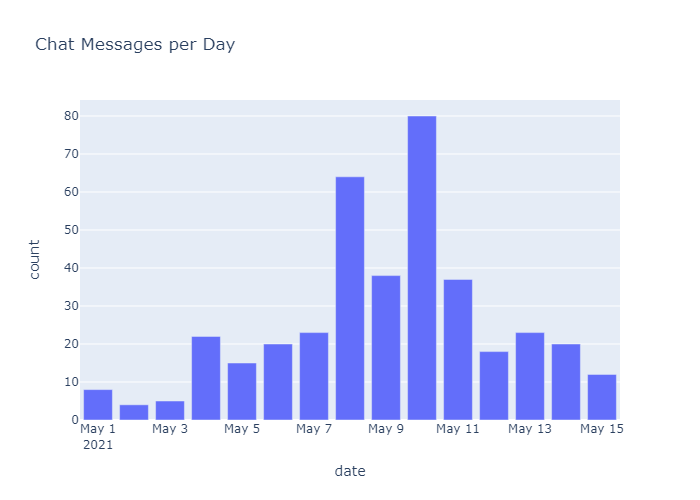

In [10]:
fig = px.bar(stats_per_day, x='date', y='count', title='Chat Messages per Day')
fig.show('png')

# Average sentiment per Day

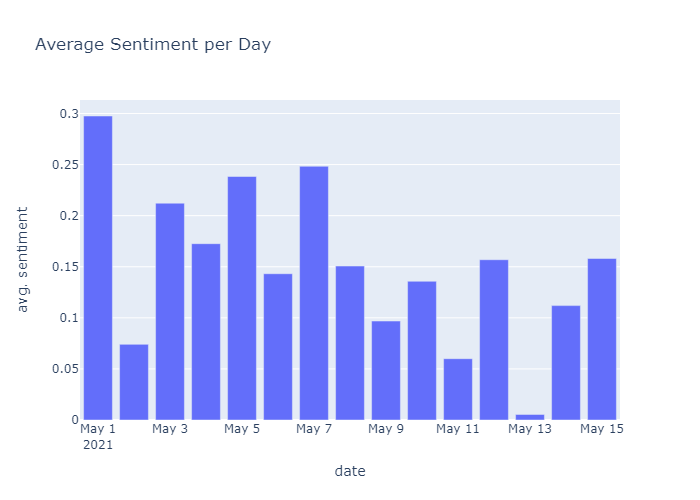

In [11]:
fig = px.bar(stats_per_day, x='date', y='avg. sentiment', title='Average Sentiment per Day')
fig.show('png')